# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['PaperlessBilling']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: object

In [8]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Churn Proportion

In [7]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Data Cleaning

## Data Type Convertion

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Clean Missing Value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Setelah mengubah TotalCharges menjadi angka numerik, kita cek missing value lalu hapus missing value-nya

In [16]:
print(df['TotalCharges'].isnull().sum())

11


ada 11 missing value yang akan kita habis barisnya, karena hanya ada 11 jadi kita hapus saja langsung barisnya

In [18]:
df.dropna(inplace=True)

In [19]:
print(df['TotalCharges'].isnull().sum())

0


# Exploratory Data Analysis (EDA)

## Apakah pelanggan dengan kontrak bulanan lebih berisiko kabur?

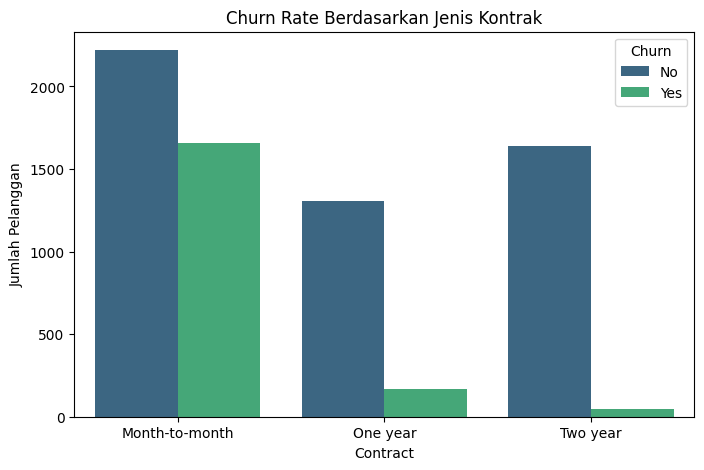

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate Berdasarkan Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Insight**

Data menunjukkan bahwa pelanggan dengan kontrak 'Month-to-month' memiliki tingkat Churn tertinggi. Ini mengindikasikan loyalitas yang rendah pada pelanggan tanpa komitmen jangka panjang. Rekomendasi: Tim Sales perlu merancang strategi 'Contract Locking', misalnya dengan menawarkan diskon khusus bagi pelanggan yang bersedia beralih ke kontrak 1 atau 2 tahun.


**Strategic Recomendation**
1. Strategi "The Hook" (Presales)
Jangan hanya menawarkan diskon harga. Tawarkan Insentif Layanan untuk kontrak jangka panjang. Contoh: "Bapak ambil kontrak 1 tahun, kami gratiskan biaya instalasi dan gratis upgrade kecepatan di 3 bulan pertama."

2. Migrasi Pelanggan (Postsales)
Identifikasi pelanggan bulanan yang sudah berlangganan > 6 bulan (mereka sebenarnya setia tapi statusnya masih berisiko). Tawarkan promo khusus "Loyalty Lock": "Ubah ke kontrak 1 tahun sekarang, tagihan bulan depan diskon 50%."

## Apakah ketiadaan Tech Support membuat pelanggan tidak puas dan kabur?

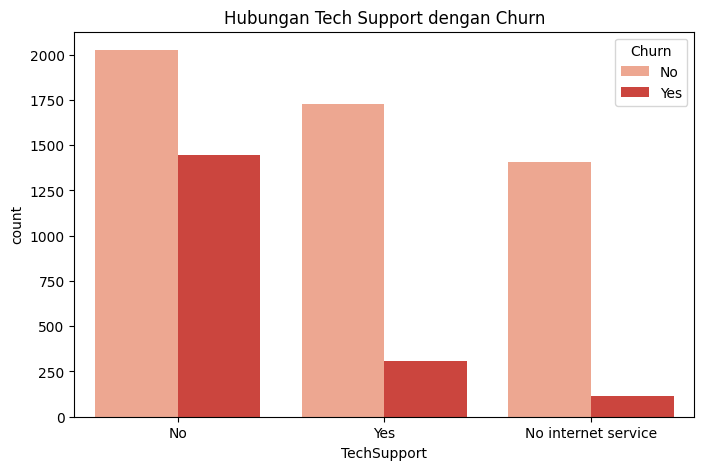

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Reds')
plt.title('Hubungan Tech Support dengan Churn')
plt.show()

**Insight**

Terdapat korelasi negatif yang kuat antara penggunaan fitur 'Tech Support' dan tingkat Churn. Pelanggan yang tidak memiliki layanan Tech Support cenderung lebih mudah berhenti berlangganan. Rekomendasi: Tech Support sebaiknya tidak dijual sebagai add-on terpisah, melainkan di-bundle sebagai layanan standar untuk meningkatkan kepuasan dan retensi pelanggan B2B.

**Strategic Recomendation**
1. Bundling Strategy (Product):
Hentikan penjualan Tech Support sebagai Add-on (tambahan berbayar) untuk akun bisnis. Jadikan Tech Support sebagai fitur standar (bawaan). Lebih baik menaikkan harga dasar sedikit tapi sudah termasuk Tech Support, daripada harga murah tapi pelanggan kecewa lalu pergi.

2. Proactive Monitoring (Postsales):
Jangan menunggu komplain. Tim support harus memonitor trafik. Jika koneksi klien terlihat tidak stabil, hubungi mereka duluan: "Halo Pak, kami mendeteksi sinyal Bapak kurang stabil, kami akan reset dari pusat ya."Ini akan meningkatkan kepuasan pelanggan secara drastis.

## Apakah pelanggan yang bayar mahal lebih setia atau justru lebih mudah kabur?

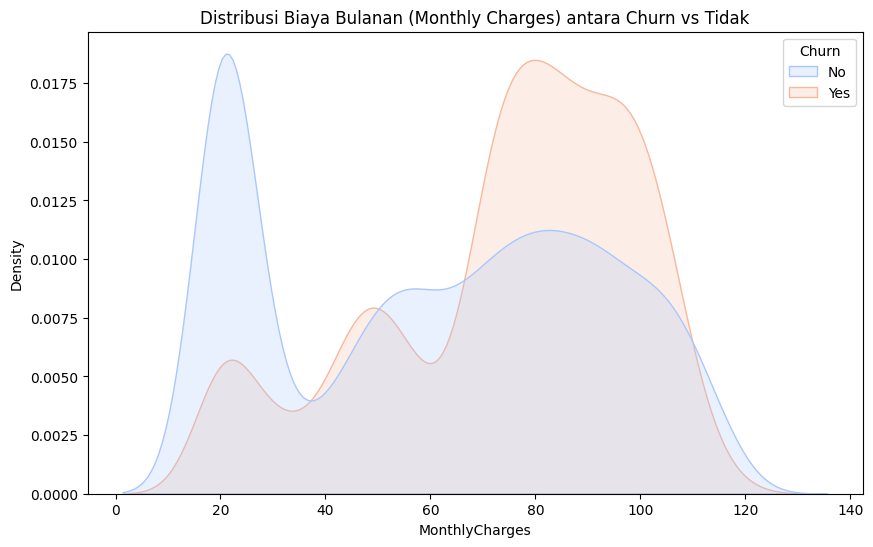

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distribusi Biaya Bulanan (Monthly Charges) antara Churn vs Tidak')
plt.show()

**Insight 3: Sensitivitas Harga (Price Sensitivity Analysis)**

Terdapat pola yang kontras antara tagihan bulanan dan tingkat Churn. Pelanggan dengan tagihan rendah (~$20) menunjukkan loyalitas yang sangat tinggi. Sebaliknya, tingkat Churn melonjak drastis pada segmen pelanggan dengan tagihan tinggi ($70-$100)

**Business Risk**

Perusahaan kehilangan revenue yang besar karena yang kabur justru pelanggan 'kelas kakap' (High Value Customers).

**Rekomendasi**

Lakukan audit kualitas layanan khusus untuk pelanggan yang membayar >$70. Pastikan mereka mendapatkan value premium (misalnya prioritas layanan) agar merasa harga mahal tersebut sepadan."*

## Apakah Tech Support bisa menyelamatkan Pelanggan Bulanan?

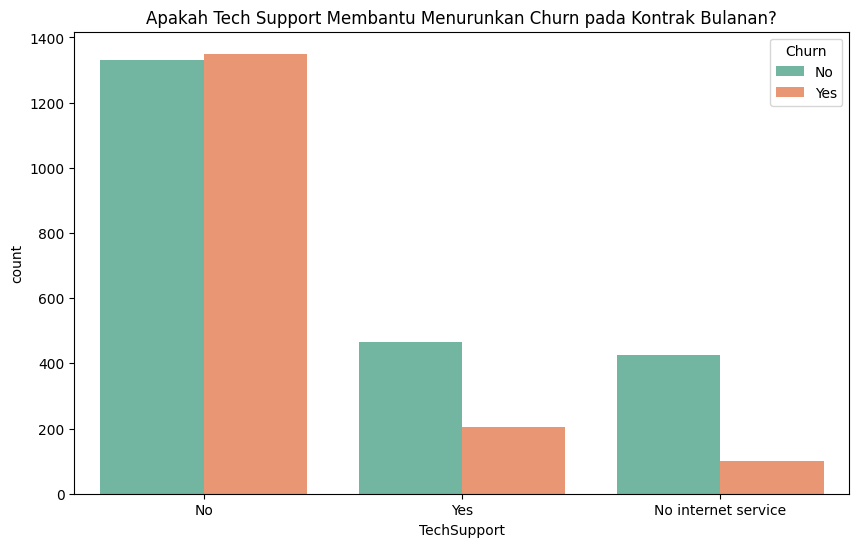

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Contract'] == 'Month-to-month'], 
            x='TechSupport', hue='Churn', palette='Set2')
plt.title('Apakah Tech Support Membantu Menurunkan Churn pada Kontrak Bulanan?')
plt.show()

**Data Observation**

Meskipun volume pelanggan terbesar berada di segmen 'No Tech Support', rasio Churn pada segmen ini sangat mengkhawatirkan (hampir 1:1 antara yang bertahan dan yang pergi). Sebaliknya, pada pelanggan yang memiliki Tech Support, rasio retensi (bertahan) meningkat drastis hingga >70%.

**Business Analysist**

Pelanggan kontrak bulanan biasanya mudah berpindah karena tidak ada ikatan. Namun, data membuktikan bahwa fitur 'Tech Support' menciptakan 'Psychological Lock-in'. Pelanggan merasa terbantu saat ada masalah teknis, sehingga enggan berpindah ke kompetitor meskipun kontrak mereka fleksibel.

**Strategic Recomendation**

Targeted Upselling Campaign :
Fokuskan tim Sales/AM untuk menghubungi pelanggan bulanan yang saat ini TIDAK memiliki Tech Support (Kelompok Kiri). Tawarkan Free Trial Tech Support selama 1 bulan. Tujuannya adalah memindahkan mereka dari 'Zona Bahaya' (Kiri) ke 'Zona Aman' (Tengah). Data memprediksi langkah ini akan menurunkan Churn Rate secara signifikan.

### Menghitung angka pasti persentase Churn khusus untuk pengguna Month-to-month berdasarkan TechSupport

In [27]:
#ambil data khusus Month-to-month
subset = df[df['Contract'] == 'Month-to-month'].copy()

# mengubah data churn menjadi bolean menggunakan map
subset['Churn'] = subset['Churn'].map({'Yes': 1, 'No': 0})

#hhitung rata-ratanya
churn_rate = subset.groupby('TechSupport')['Churn'].mean() * 100

print("Persentase Churn pada Pelanggan Bulanan (Berdasarkan Tech Support):")
print(churn_rate)

Persentase Churn pada Pelanggan Bulanan (Berdasarkan Tech Support):
TechSupport
No                     50.373134
No internet service    18.893130
Yes                    30.700447
Name: Churn, dtype: float64


**Critical Finding: The 50% Churn Trap**

Analisis mendalam pada segmen 'Month-to-month' mengungkapkan risiko kritis: Pelanggan tanpa layanan Tech Support memiliki Churn Rate sebesar 50.3%. Artinya, perusahaan kehilangan separuh dari segmen ini secara reguler. Namun, data membuktikan bahwa pelanggan yang mengaktifkan Tech Support memiliki Churn Rate yang jauh lebih rendah (30.7%). Ini membuktikan bahwa Tech Support bukan sekadar biaya operasional, melainkan instrumen retensi yang mampu menurunkan risiko kehilangan pelanggan hingga ~20%.

**Actionable Strategy**

Wajibkan bundling 'Tech Support' untuk setiap penjualan kontrak bulanan baru (Presales Strategy) untuk memangkas angka churn 50% tersebut."

# Predection Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Preprocessing

In [29]:
df_model = df.copy()

In [30]:
# Pastikan 'customerID' sudah terhapus. 
if 'customerID' in df_model.columns:
    df_model.drop(columns=['customerID'], inplace=True)

In [32]:
# ubah Target 'Churn' (Yes/No) menjadi Angka (1/0)
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

In [33]:
# Mengubah semua data kategori (Teks) menjadi Angka dengan One-Hot Encoding
df_final = pd.get_dummies(df_model, drop_first=True)

In [34]:
df_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


## Data Splitting

In [35]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [36]:
# 80% untuk Data Training, 20% untuk Data Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling (Melatih Random Forest)

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training telah selesai")

Training telah selesai


## Model Evaluation

In [38]:
y_pred = rf_model.predict(X_test)

In [40]:
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))


Akurasi Model: 78.54%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



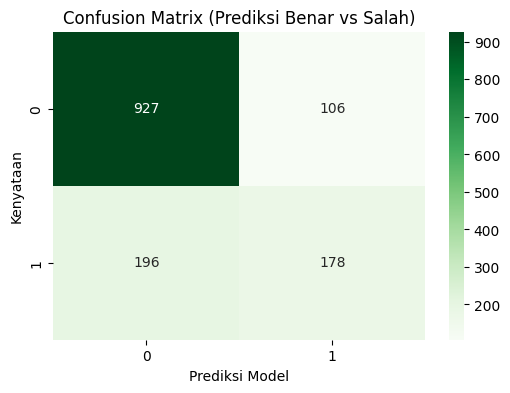

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Prediksi Benar vs Salah)')
plt.ylabel('Kenyataan')
plt.xlabel('Prediksi Model')
plt.show()

### Feature Importance

In [43]:
# Cek Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

In [44]:
feature_imp = pd.DataFrame({'Fitur': feature_names, 'Pentingnya': importances})

In [45]:
# Urutkan dari yang paling berpengaruh
feature_imp = feature_imp.sort_values(by='Pentingnya', ascending=False).head(10)

C:\Users\MSI BRAVO\AppData\Local\Temp\ipykernel_20860\675925027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_imp, palette='viridis')


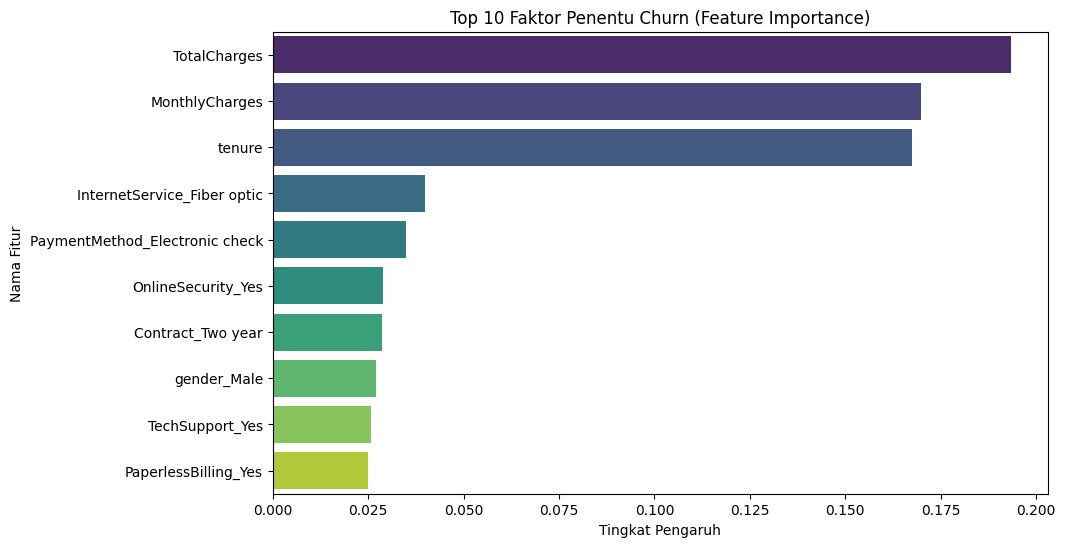

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_imp, palette='viridis')
plt.title('Top 10 Faktor Penentu Churn (Feature Importance)')
plt.xlabel('Tingkat Pengaruh')
plt.ylabel('Nama Fitur')
plt.show()

# Conclution

## Analisis Feature Importance & KDE Plot

**Observasi**

Pada Feature Importance, fitur TotalCharges dan MonthlyCharges menempati peringkat #1 dan #2 sebagai faktor paling penentu churn. Data ini diperkuat oleh KDE Plot, di mana puncak kurva Churn (Oranye) berada di angka tagihan tinggi ($70 - $100), sedangkan pelanggan dengan tagihan rendah ($20) sangat setia.

**Insight Bisnis**

Perusahaan mengalami 'Revenue Leakage' (kebocoran pendapatan) pada segmen Premium. Pelanggan yang pergi bukanlah pelanggan 'murahan', melainkan High Value Customers (Paus Besar) yang membayar mahal. Kehilangan 1 pelanggan di segmen ini setara dengan kehilangan 4-5 pelanggan biasa.

**Rekomendasi**

Priority Service: Pelanggan dengan tagihan >$70 harus masuk ke jalur layanan prioritas (VIP Support) agar mereka merasa harga mahal tersebut sepadan.

## "Fiber Optic" Red Flag

**Observasi**

Lihat bar ke-4: InternetService_Fiber optic. Ini adalah satu-satunya jenis produk teknis yang muncul di Top 5 faktor penyebab churn.

**Insight Bisnis**

Ada masalah spesifik pada produk Fiber Optic. Mengingat Fiber Optic biasanya adalah layanan termahal dan tercepat, tingginya pengaruh fitur ini terhadap Churn mengindikasikan adanya ketidakpuasan terhadap kualitas vs harga (Price-to-Value mismatch) atau masalah teknis yang sering terjadi pada jaringan Fiber."

**Rekomendasi**

Audit Teknis: Minta tim teknis segera memeriksa stabilitas jaringan di area pengguna Fiber Optic. Kemungkinan besar ada gangguan yang tidak terdeteksi yang membuat pelanggan premium ini kecewa.

## Masalah Pembayaran Manual

**Observasi**

Bar ke-5 adalah PaymentMethod_Electronic check. Metode pembayaran lain (Kartu Kredit, Transfer Bank) tidak muncul di Top 10.

**Insight Bisnis**

Pelanggan yang membayar menggunakan cek elektronik (biasanya manual setiap bulan) memiliki kecenderungan churn lebih tinggi dibandingkan mereka yang menggunakan Auto-debit. Proses pembayaran yang 'merepotkan' meningkatkan friksi dan memberi celah bagi pelanggan untuk memikirkan ulang langganan mereka setiap bulan.

**Rekomendasi**

Push to Auto-Pay: Berikan diskon 5% untuk pelanggan yang bersedia pindah metode bayar ke Kartu Kredit atau Auto-debit Bank untuk mengunci komitmen ("Lock-in").

## Estimasi Dampak Finansial (Analisis Confusion Matrix)

**Observasi**

Model berhasil menangkap 178 pelanggan (True Positive) yang akan churn.

**Kalkulasi ROI (Return on Investment)**

Mari kita asumsikan rata-rata tagihan pelanggan yang churn adalah $80 (berdasarkan puncak grafik oranye di Gambar 1). Revenue Saved: 178 Pelanggan x $80 = $14,240 (Rp 200+ Juta) per bulan yang bisa diselamatkan

**Kesimpulan**

Dengan akurasi 78%, model ini berpotensi menyelamatkan revenue sebesar ~$14,000 per bulan hanya dengan memberikan daftar target prioritas kepada tim retensi

## Berdasarkan analisis data, strategi B2B harus difokuskan pada 'High-Value Retention Program'. Tim AM perlu memprioritaskan kunjungan/kontak kepada klien yang

1. Menggunakan layanan Fiber Optic

2. Memiliki tagihan bulanan di atas $70.

3. Masih menggunakan metode bayar manual (Electronic Check).

Ketiga indikator ini adalah sinyal awal churn yang paling kuat.